In [11]:
import os
import sys
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pickle

In [8]:
OUTPUT_FILE = '6_output.csv'
with open(OUTPUT_FILE, 'r') as fin:
    data_iter = csv.reader(fin)
    data = [np.array(data) for data in data_iter]
data_array = np.array(data)
header_array = data_array[0]
data_array = data_array[1:]
data_array = data_array.astype(np.float32)

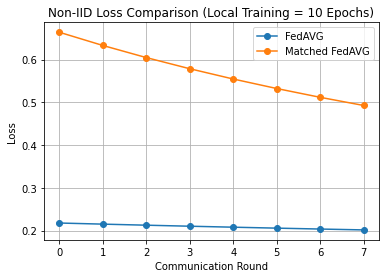

In [9]:
comm_rounds = data_array[:,0].astype(np.int)
fedAvg_test_loss = data_array[:,-2]
matched_fedAvg_test_loss = data_array[:,-1]
fedAVG_local_loss_1 = data_array[:,1]
fedAVG_local_loss_2 = data_array[:,2]
matched_fedAVG_local_loss_1 = data_array[:,3]
matched_fedAVG_local_loss_2 = data_array[:,4]
plt.plot(comm_rounds, fedAvg_test_loss, marker='o', label='FedAVG')
plt.plot(comm_rounds, matched_fedAvg_test_loss, marker='o', label='Matched FedAVG')
plt.title('Non-IID Loss Comparison (Local Training = 10 Epochs)')
plt.xlabel('Communication Round')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc="upper right")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
#plt.ylim(0.15, 0.4)
plt.show()

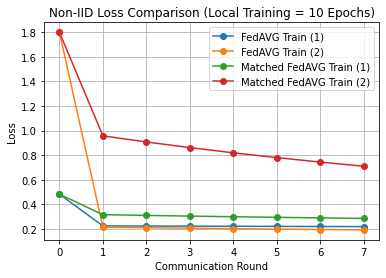

In [10]:
comm_rounds = data_array[:,0].astype(np.int)
fedAvg_test_loss = data_array[:,-2]
matched_fedAvg_test_loss = data_array[:,-1]
fedAVG_local_loss_1 = data_array[:,1]
fedAVG_local_loss_2 = data_array[:,2]
matched_fedAVG_local_loss_1 = data_array[:,3]
matched_fedAVG_local_loss_2 = data_array[:,4]
plt.plot(comm_rounds, fedAVG_local_loss_1, marker='o', label='FedAVG Train (1)')
plt.plot(comm_rounds, fedAVG_local_loss_2, marker='o', label='FedAVG Train (2)')
plt.plot(comm_rounds, matched_fedAVG_local_loss_1, marker='o', label='Matched FedAVG Train (1)')
plt.plot(comm_rounds, matched_fedAVG_local_loss_2, marker='o', label='Matched FedAVG Train (2)')
plt.title('Non-IID Loss Comparison (Local Training = 10 Epochs)')
plt.xlabel('Communication Round')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc="upper right")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
#plt.ylim(0.15, 0.4)
plt.show()

In [16]:
log_prefix = os.path.join('weight_logs', '6_benchmark_fedma_')
EPOCH = 8
for epoch in range(EPOCH):
    log_file = log_prefix + str(epoch) + '.pkl'
    node_weights = None
    with open(log_file, 'rb') as fin:
        node_weights = pickle.load(fin)
    node_count = len(node_weights)
    for node in range(node_count):
        node_weight = node_weights[node]
        weight_count = len(node_weight)
        for i in range(weight_count):
            print(node_weight[i].shape)
    

(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
(16, 16)
(16,)
